In [138]:
import stepfindInOut as sio
from AutoSteppyfinder import *
import skimage.filters as filters
import os
from PIL import Image
import matplotlib.patches as mpatches

In [139]:
def get_image(folder,n):
    nstr=str(n).zfill(3)
    files = os.listdir(folder)
    files.sort()
    filename=[file for file in files if file[-7:-4]==nstr]
    fpath=folder+filename[-1]
    im=Image.open(fpath)
    imarray=np.array(im,dtype=np.int32)
    return imarray
def kernel_evol(evol,i,j):
    k=1/10*(2*evol[:,i,j]+evol[:,i-1,j]+evol[:,i+1,j]+evol[:,i,j-1]+evol[:,i,j+1]++evol[:,i+1,j-1]+evol[:,i+1,j+1]+evol[:,i-1,j-1]+evol[:,i-1,j+1])
    #k=evol[:,i,j]
    return k

In [140]:
def temporal_evolution(folder,N,roi=[0,512,0,512]):
    im0=get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]]
    data0=np.zeros_like(im0)
    data=np.stack((data0,im0))
    for i in range (2,N):
        d=get_image(folder,i)[roi[0]:roi[1],roi[2]:roi[3]]
        data=np.append(data,[d],axis=0)
    data=np.delete(data,0,0)
    return data

In [141]:
def AutoStepMain(dataX, i = None, j = None, tresH = 0.15, N_iter = 100, ax = None):
    demo = 1
    FitX = 0 * dataX
    #print("working on pixel (%i,%i)" %(i,j))
    # multipass:
    for ii in range(0, 3, 1):
        # work remaining part of data:
        residuX = dataX - FitX
        newFitX, _, _, S_curve, best_shot = core.stepfindcore(
            residuX, demo, tresH, N_iter
        )
        FitX = st.AppendFitX(newFitX, FitX, dataX)
        # storage for plotting:
        if ii == 0:
            Fits = np.copy(FitX)
            S_curves = np.copy(S_curve)
            best_shots = [best_shot]
        elif best_shot > 0:
            Fits = np.vstack([Fits, FitX])
            S_curves = np.vstack([S_curves, S_curve])
            best_shots = np.hstack([best_shots, best_shot])

    # steps from final fit:
    steptable = st.Fit2Steps(dataX, FitX)

    
    return S_curves, best_shots, Fits

In [169]:
folder='../../../Data/with_barium/quartz/33/Photobleaching_1mW_F12/Field1/'
os.listdir(folder)
files = os.listdir(folder)
files

['Image00357.tif',
 'Image358_00001.tif',
 'Image358_00002.tif',
 'Image358_00003.tif',
 'Image358_00004.tif',
 'Image358_00005.tif',
 'Image358_00006.tif',
 'Image358_00007.tif',
 'Image358_00008.tif',
 'Image358_00009.tif',
 'Image358_00010.tif',
 'Image358_00011.tif',
 'Image358_00012.tif',
 'Image358_00013.tif',
 'Image358_00014.tif',
 'Image358_00015.tif',
 'Image358_00016.tif',
 'Image358_00017.tif',
 'Image358_00018.tif',
 'Image358_00019.tif',
 'Image358_00020.tif',
 'Image358_00021.tif',
 'Image358_00022.tif',
 'Image358_00023.tif',
 'Image358_00024.tif',
 'Image358_00025.tif',
 'Image358_00026.tif',
 'Image358_00027.tif',
 'Image358_00028.tif',
 'Image358_00029.tif',
 'Image358_00030.tif',
 'Image358_00031.tif',
 'Image358_00032.tif',
 'Image358_00033.tif',
 'Image358_00034.tif',
 'Image358_00035.tif',
 'Image358_00036.tif',
 'Image358_00037.tif',
 'Image358_00038.tif',
 'Image358_00039.tif',
 'Image358_00040.tif',
 'Image358_00041.tif',
 'Image358_00042.tif',
 'Image358_0004

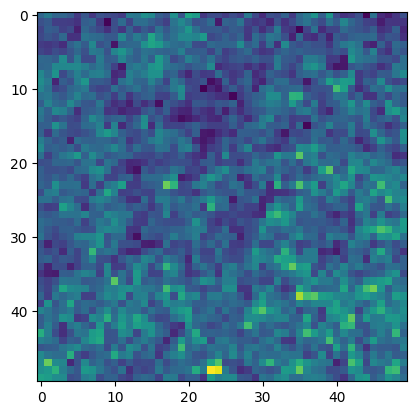

In [171]:
roi=[100,202,150,250]
roi=[100,150,200,250]
plt.imshow(get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]])

In [172]:
evol=temporal_evolution(folder,300,roi)

In [173]:
I, J = np.shape(evol[0])
tresH = 0.5
N_iter = 50
stepsizes=np.array([])
times=np.array([])
points=np.array([0,0])
for i in range(I):
    for j in range(J):
        try:
            dataX = kernel_evol(evol,i,j)
            try:
                S_curve, best_shots, Fits = AutoStepMain(dataX, i=i, j=j, ax = None, tresH = tresH, N_iter=N_iter)
                nfits=len(best_shots)
                if nfits>1:
                    S_curve=S_curve[0]
                    Fits=Fits[0]
                if S_curve[best_shots[0]] > tresH:
                    points=np.vstack((points,[i,j]))
                    stepsizes=np.append(stepsizes,np.abs(np.unique(np.diff(Fits))))
                    times=np.append(times,np.where(np.diff(Fits)<0))                
                    ax[1].plot(S_curve)
            except ValueError: pass
        except : pass
    print('{}/{} Done!'.format(i+1,I) )
points=np.delete(points,0,0)
stepsizes=stepsizes[stepsizes!=0]
        

1/50 Done!
2/50 Done!
3/50 Done!
4/50 Done!
5/50 Done!
6/50 Done!
7/50 Done!
8/50 Done!
9/50 Done!
10/50 Done!
11/50 Done!
12/50 Done!
13/50 Done!
14/50 Done!
15/50 Done!
16/50 Done!
17/50 Done!
18/50 Done!
19/50 Done!
20/50 Done!
21/50 Done!
22/50 Done!
23/50 Done!
24/50 Done!
25/50 Done!
26/50 Done!
27/50 Done!
28/50 Done!
29/50 Done!
30/50 Done!
31/50 Done!
32/50 Done!
33/50 Done!
34/50 Done!
35/50 Done!
36/50 Done!
37/50 Done!
38/50 Done!
39/50 Done!
40/50 Done!
41/50 Done!
42/50 Done!
43/50 Done!
44/50 Done!
45/50 Done!
46/50 Done!
47/50 Done!
48/50 Done!
49/50 Done!
50/50 Done!


In [174]:
np.shape(points)

(46, 2)

Text(0, 0.5, '# of occurrences')

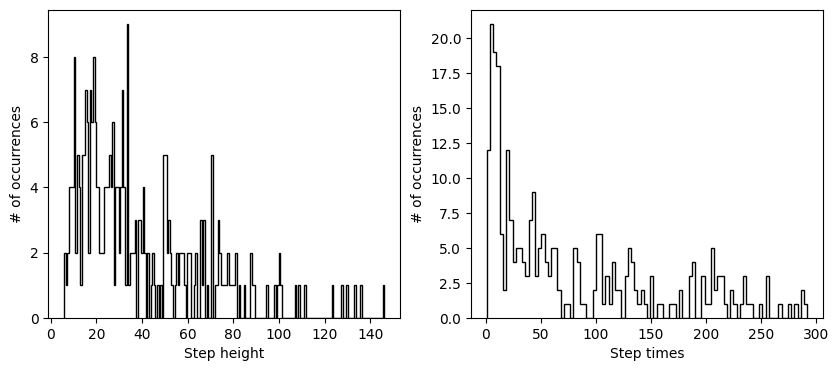

In [175]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(stepsizes,bins=200,histtype=u'step',color='k')
ax[1].hist(times,bins=100,histtype=u'step',color='k')

ax[0].set_xlabel('Step height')
ax[1].set_xlabel('Step times')
ax[0].set_ylabel('# of occurrences')
ax[1].set_ylabel('# of occurrences')

C:\Users\Mikel\AppData\Local\Temp\ipykernel_25572\3984800891.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


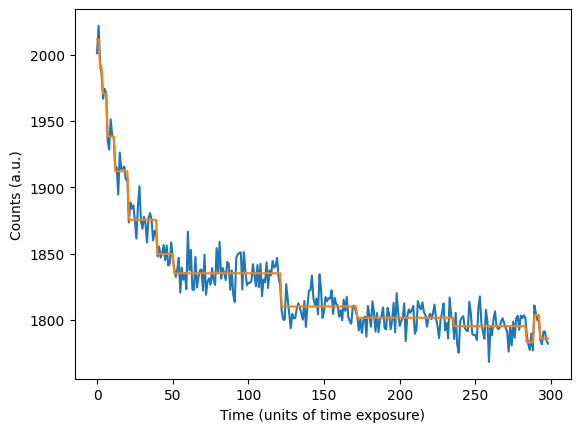

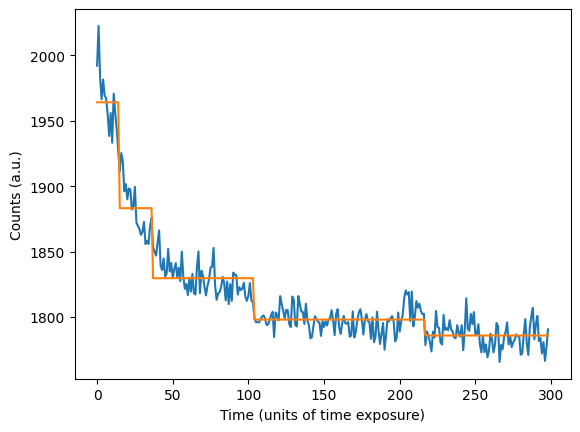

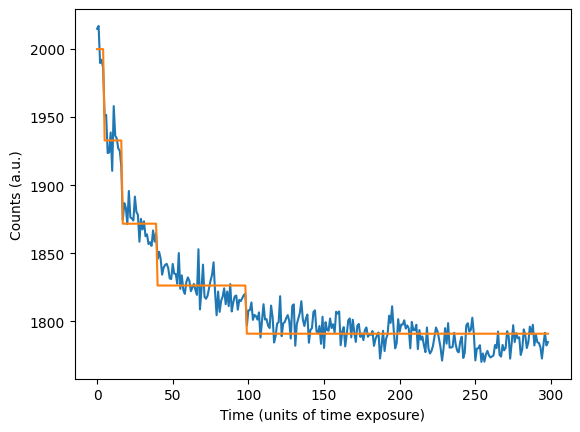

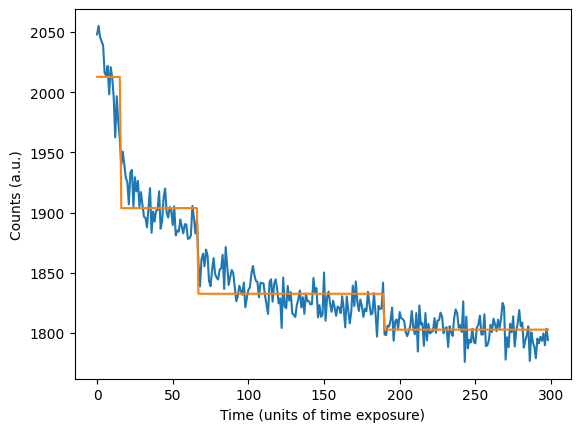

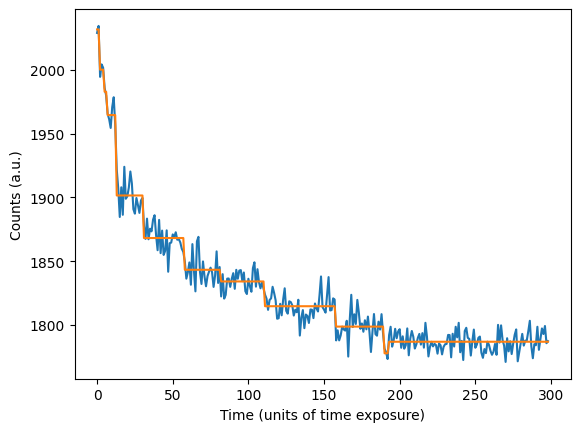

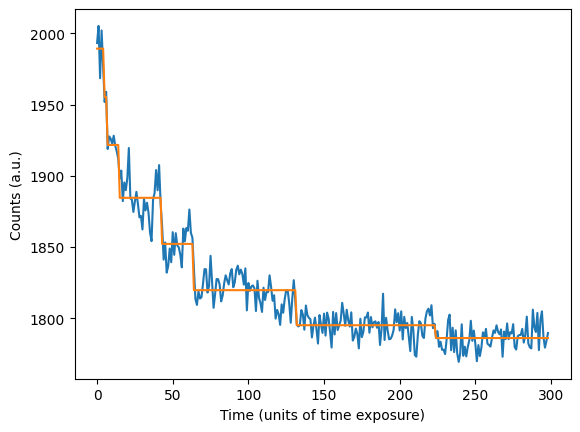

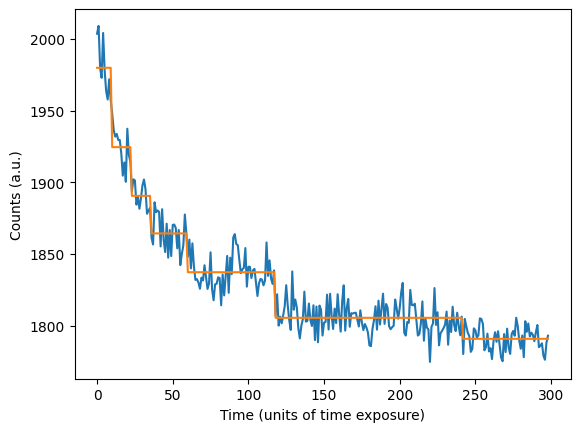

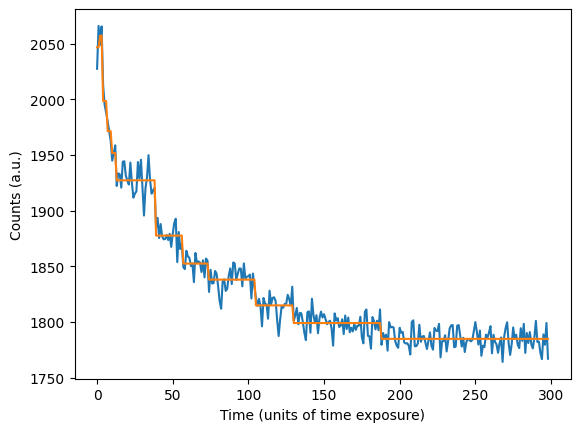

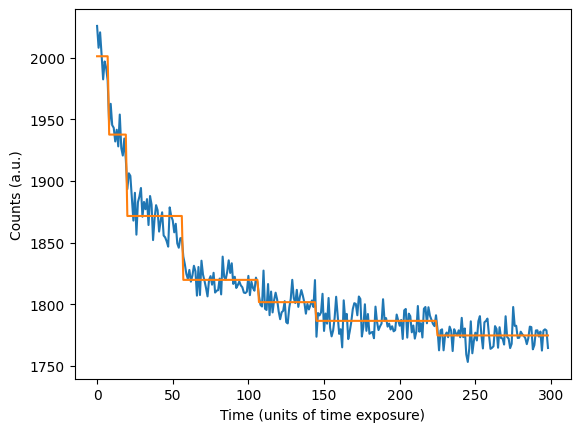

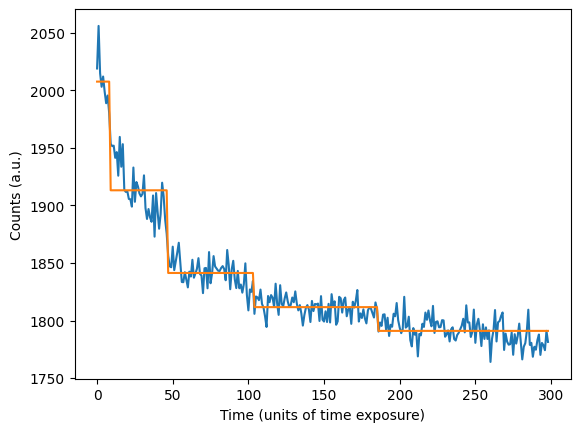

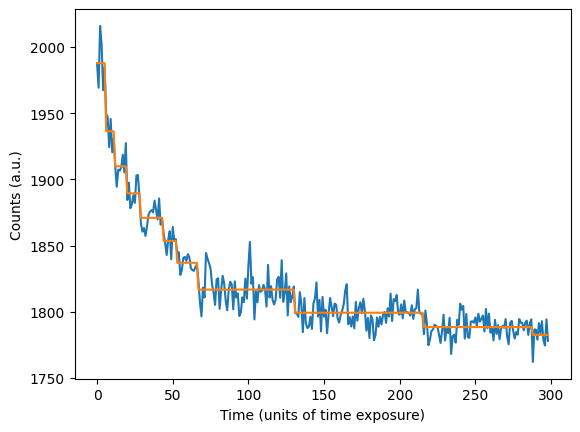

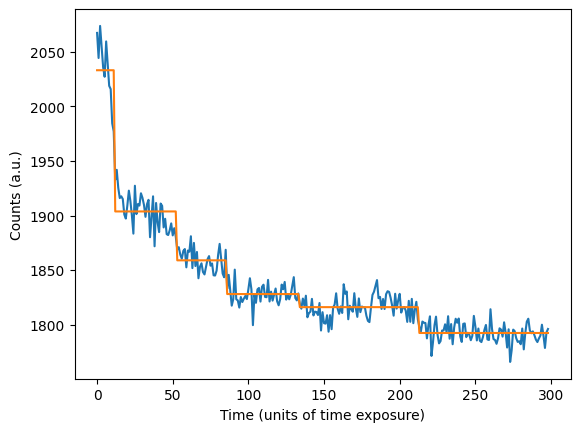

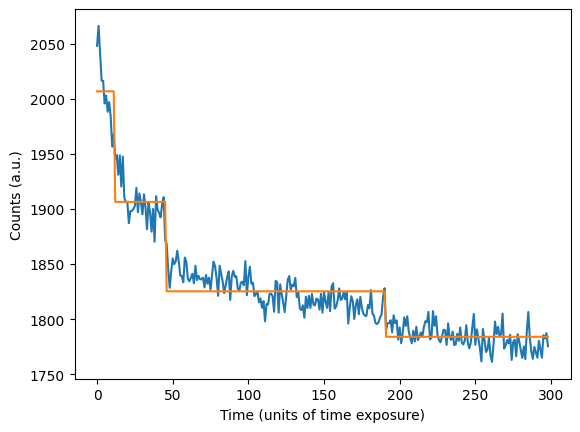

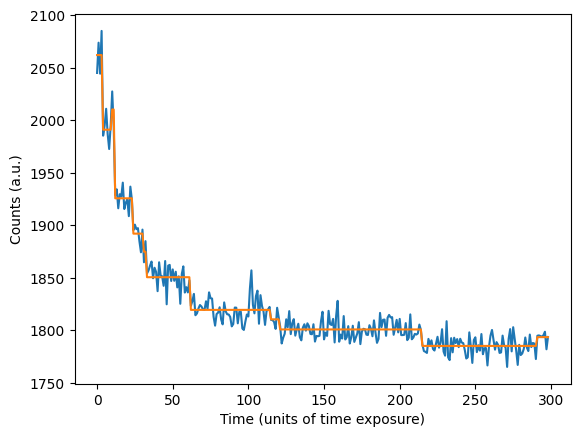

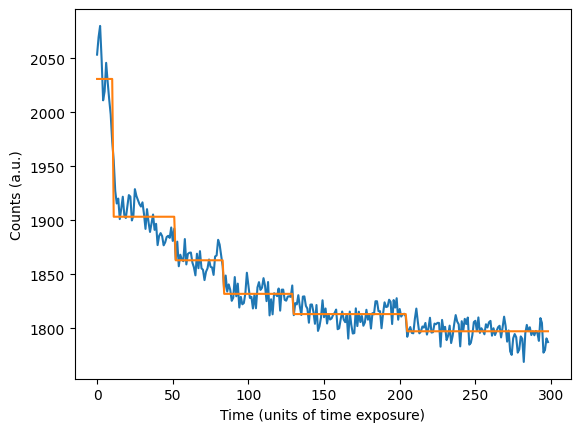

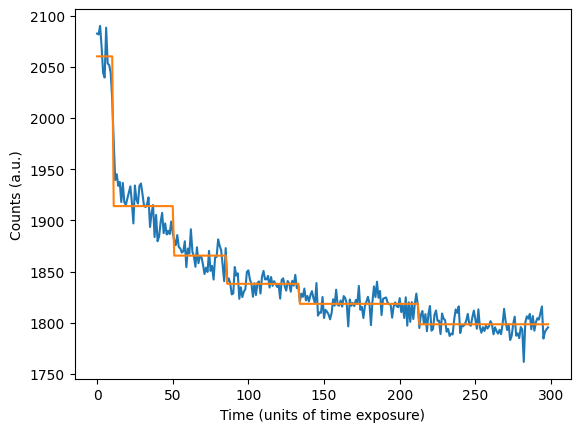

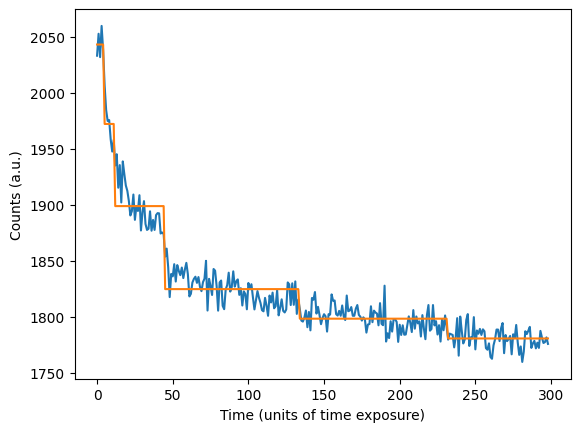

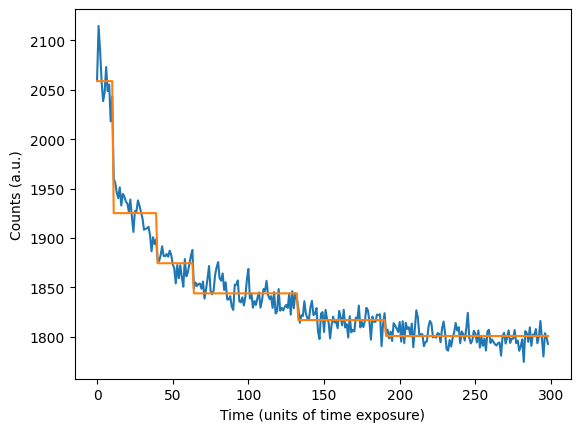

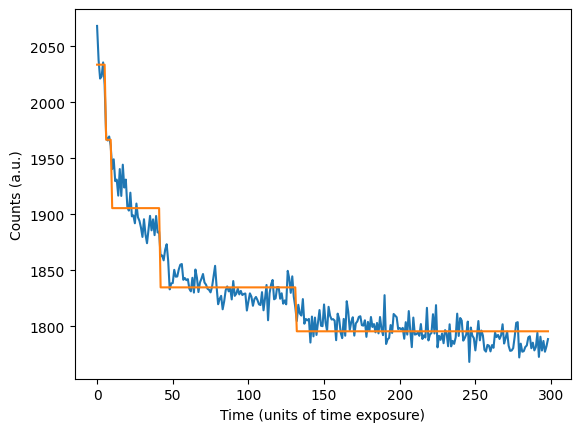

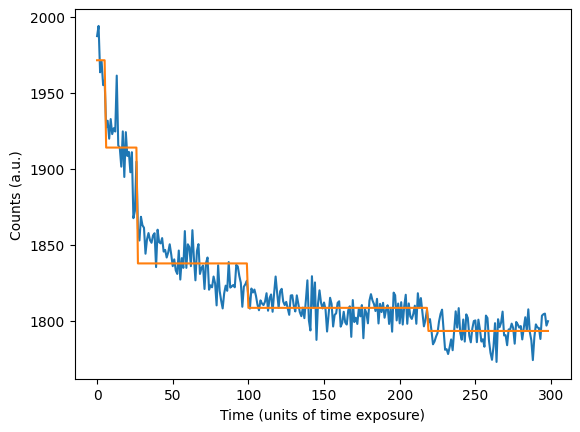

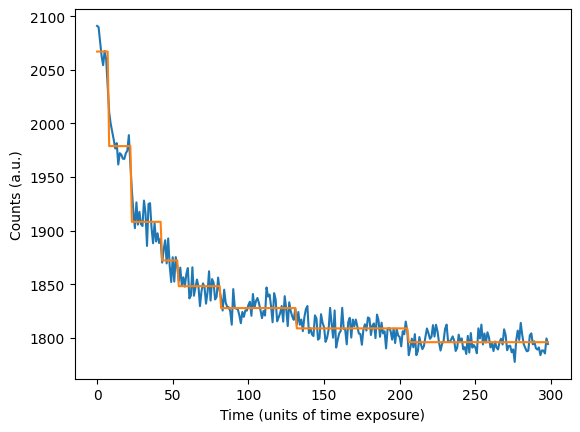

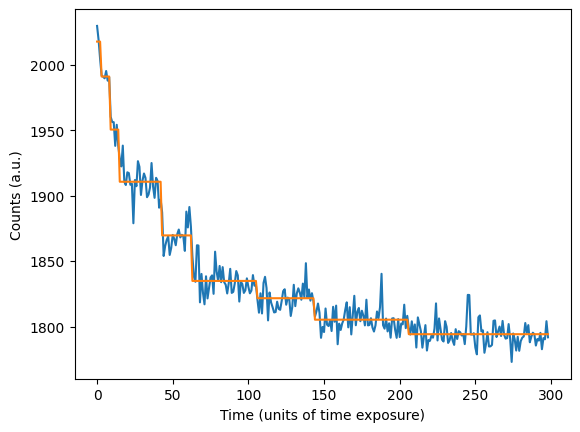

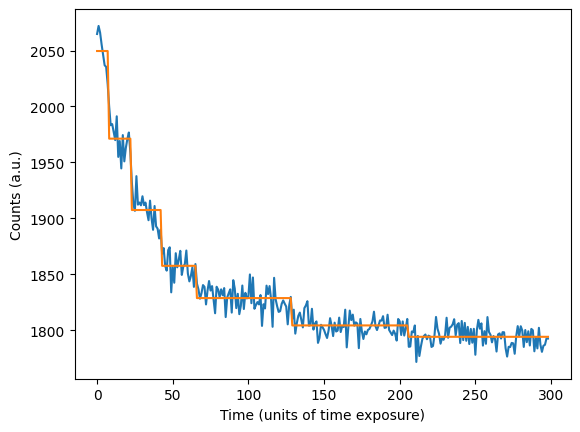

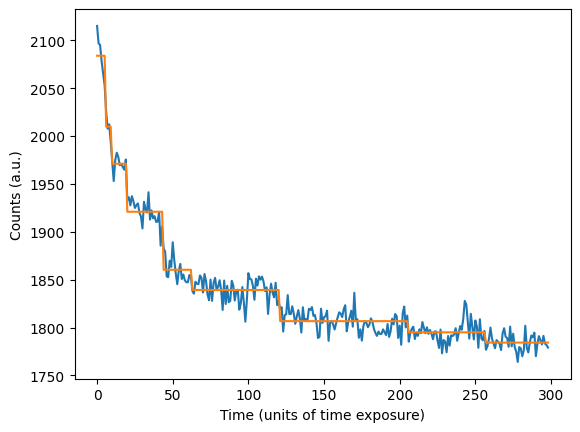

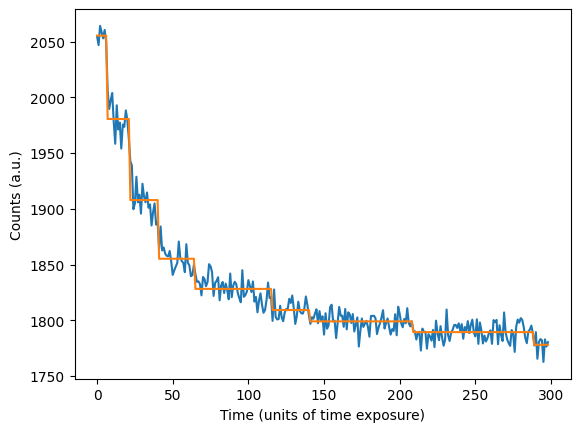

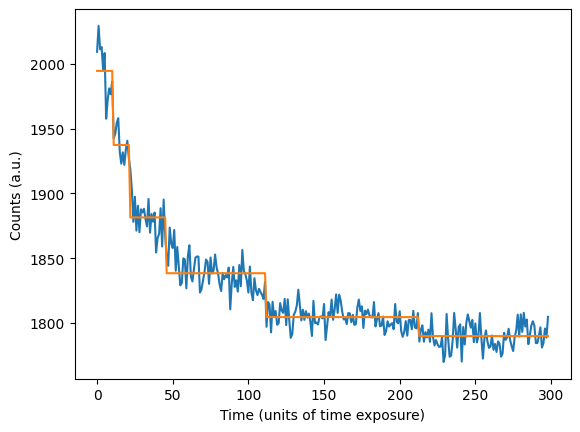

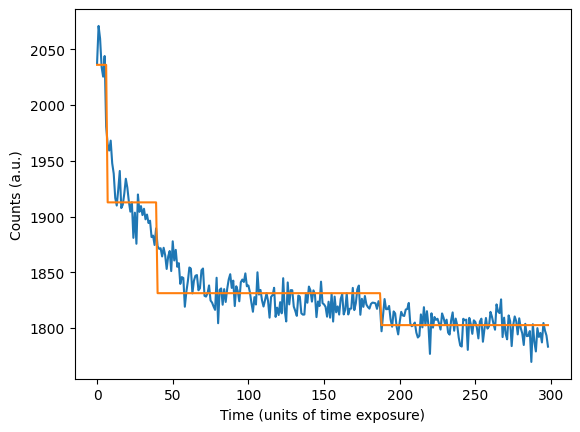

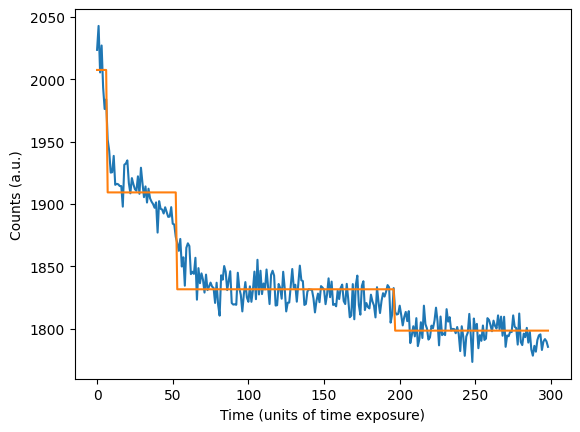

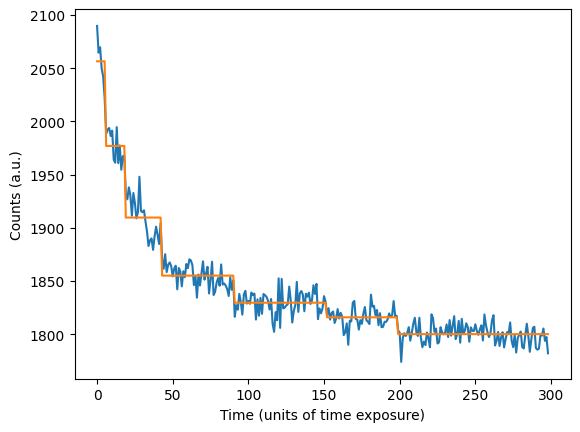

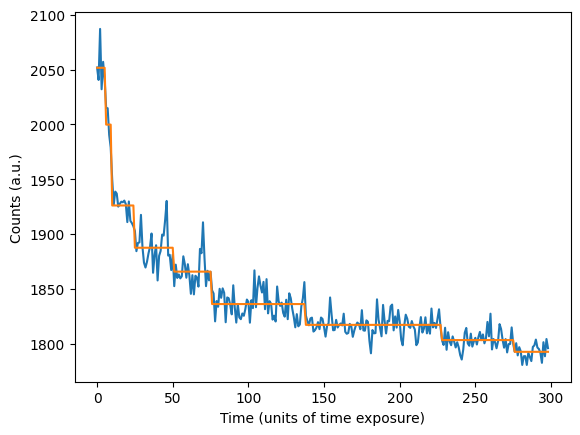

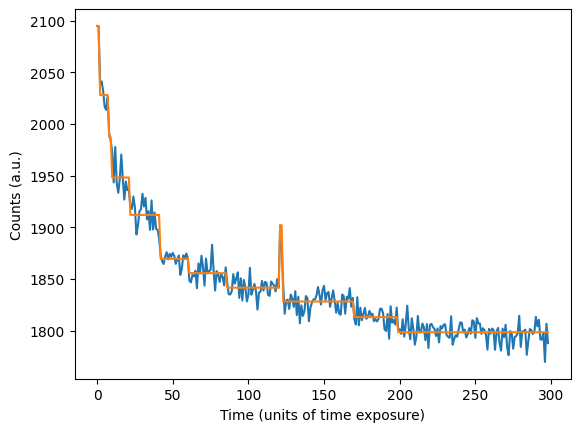

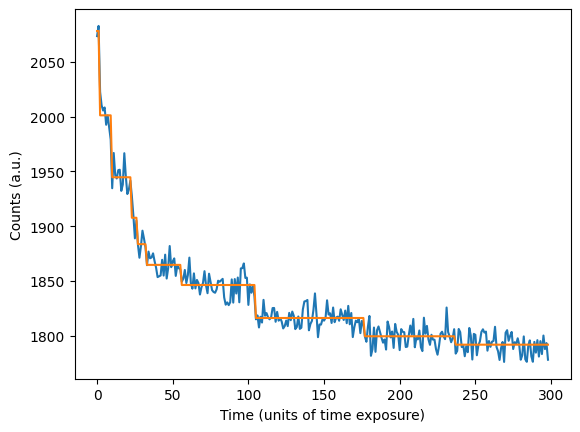

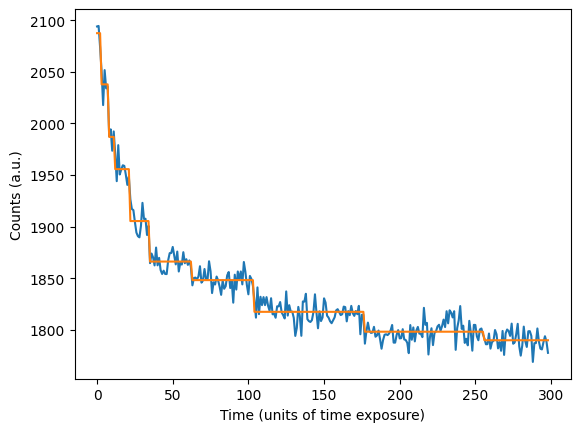

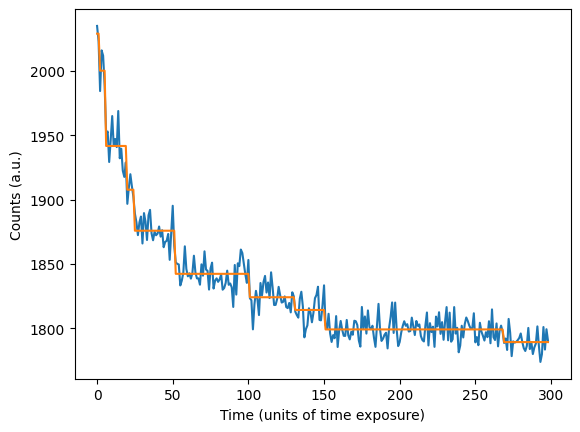

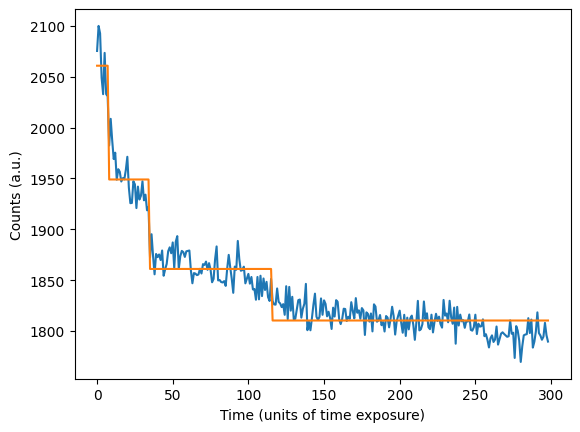

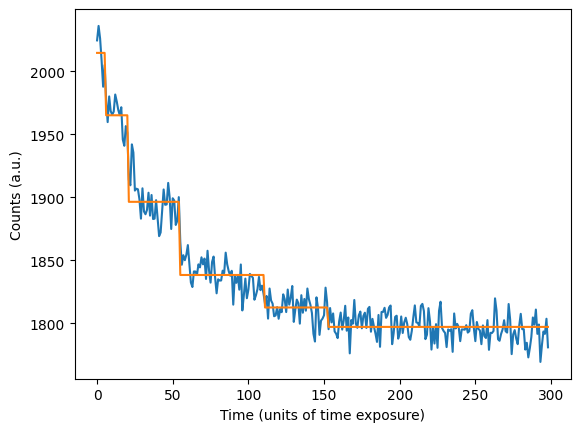

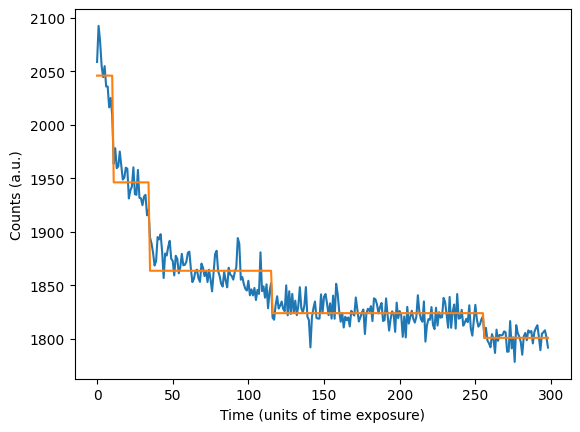

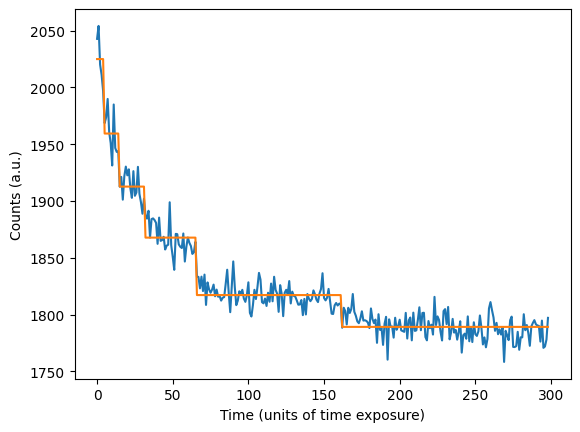

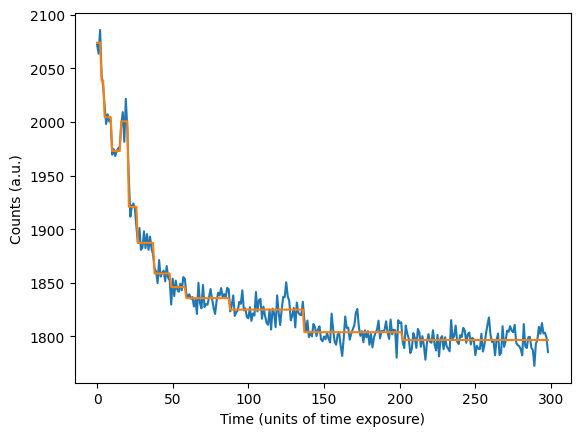

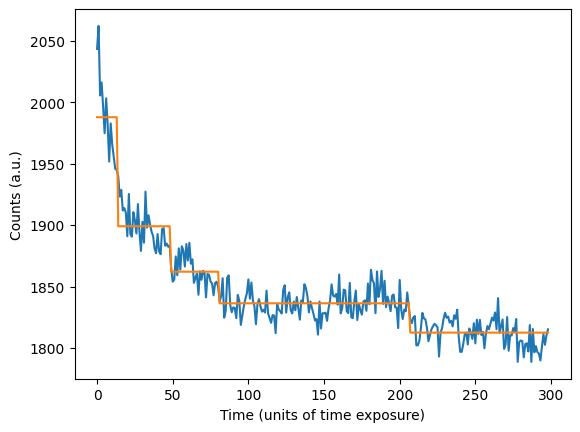

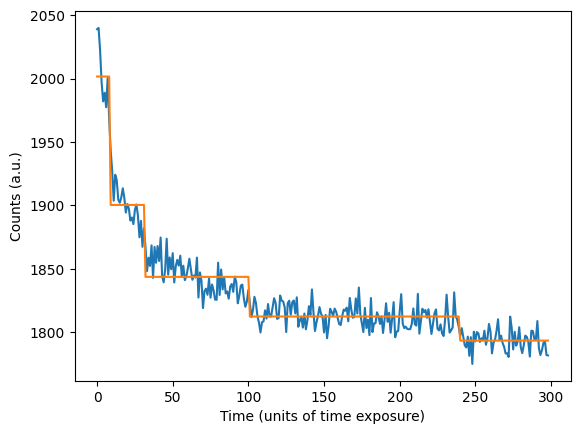

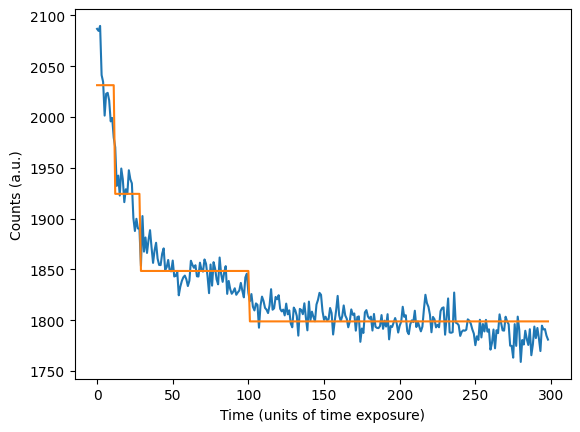

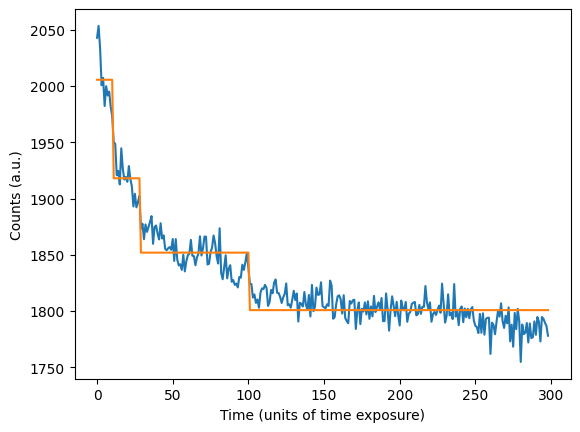

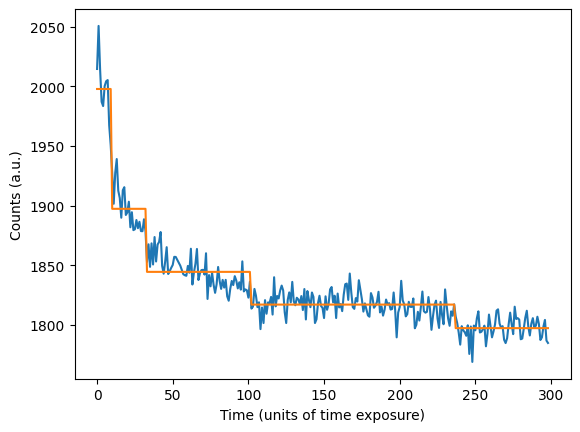

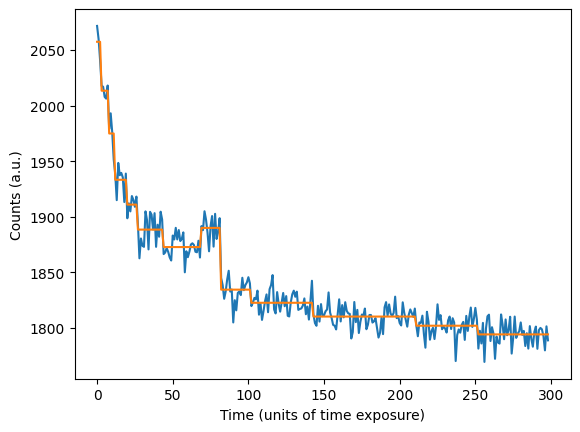

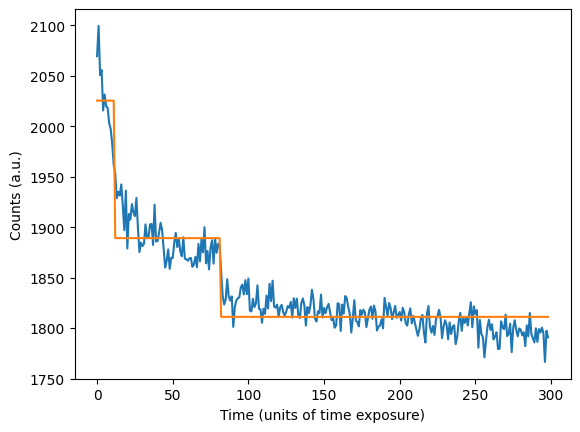

In [176]:
for [i,j] in points[0:100]:
    dataX = kernel_evol(evol,i,j)
    S_curve, best_shots, Fits = AutoStepMain(dataX, i=i, j=j, ax = None, tresH = tresH, N_iter=N_iter)
    nfits=len(best_shots)
    if nfits>1:
        S_curve=S_curve[0]
        Fits=Fits[0]
        #print(np.shape(Fits))
    plt.figure()
    plt.plot(dataX)
    plt.plot(Fits)
    plt.ylabel('Counts (a.u.)')
    plt.xlabel('Time (units of time exposure)')

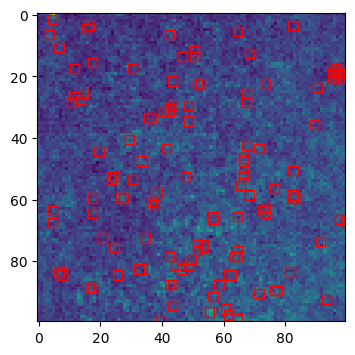

In [162]:
fig, ax = plt.subplots(1,1,figsize=(4, 4))
plt.imshow(get_image(folder,1)[roi[0]:roi[1],roi[2]:roi[3]])
for [i,j] in points:
    rect = mpatches.Rectangle((j, i), 3,3,
                                      fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)